<a href="https://colab.research.google.com/github/DrBart20/EksploracjaDanych/blob/main/Zaj6/Zadanie_integracja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

In [14]:
df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_co2.head()

In [5]:
df_primary_energy = pd.read_csv("/content/primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878


In [9]:
df_poland = df_co2[df_co2["Entity"] == "Poland"]
df_poland.head()


,Entity,Year,Annual CO₂ emissions (per capita)
19063,Poland,1800,0.045189
19064,Poland,1801,0.048900
19065,Poland,1802,0.049344
19066,Poland,1803,0.050177
19067,Poland,1804,0.049414


In [8]:
df_poland_energy = df_primary_energy[df_primary_energy["Entity"] == "Poland"]
df_poland_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
9734,Poland,POL,1965,776.05330
9735,Poland,POL,1966,791.17820
9736,Poland,POL,1967,814.29987
9737,Poland,POL,1968,876.36676
9738,Poland,POL,1969,936.06604


In [10]:
df_poland_merged = pd.merge(df_poland, df_poland_energy, on='Year', how='inner')
df_poland_merged_clean = df_poland_merged[['Year', 'Annual CO₂ emissions (per capita)', 'Primary energy consumption (TWh)']]
df_poland_merged_clean.to_csv('poland_energy_co2.csv', index=False)
print("Dane dla Polski dotyczące CO2 i energii zostały połączone i zapisane do pliku: poland_energy_co2.csv")

Dane dla Polski dotyczące CO2 i energii zostały połączone i zapisane do pliku: poland_energy_co2.csv


In [16]:
df = pd.read_csv("/content/poland_energy_co2.csv")
display(df)

,Year,Annual CO₂ emissions (per capita),Primary energy consumption (TWh)
0,1965,7.893703,776.05330
1,1966,7.996349,791.17820
2,1967,8.138128,814.29987
3,1968,8.597721,876.36676
4,1969,9.076116,936.06604
5,1970,9.345997,987.92114
6,1971,9.547403,1019.14355
7,1972,9.972351,1074.91880
8,1973,10.067717,1095.06400
9,1974,10.291654,1131.25630


In [33]:
#Część 2
df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_energy = pd.read_csv("/content/primary-energy-cons.csv")

countries = ["United States", "China", "India", "European Union"]
with pd.ExcelWriter("co2_energy_by_country.xlsx", engine="openpyxl") as writer:

  for i in countries:
    df_country = df_co2[df_co2["Entity"] == i]
    df_country_energy = df_energy[df_energy["Entity"] == i]
    df_country_merged = pd.merge(df_country, df_country_energy, on='Year', how='inner')
    df_country_merged.rename(columns={'Entity_x': 'Entity'}, inplace=True)
    df_country_merged_clean = df_country_merged[['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)', 'Primary energy consumption (TWh)']]
    sheet_name = i
    df_country_merged_clean.to_excel(writer,sheet_name=sheet_name,index=False)





In [34]:
#Część 3
df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_energy = pd.read_csv("/content/primary-energy-cons.csv")

countries = ["Poland", "Germany", "Spain"]
conn = sqlite3.connect("energy_co2.db")
cursor = conn.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS energy_co2 (Entity TEXT, Code TEXT, Year INTEGER, 'Annual CO₂ emissions (per capita)' REAL, 'Primary energy consumption (TWh)' REAL)")
rows = []
for i in countries:
  df_country = df_co2[df_co2["Entity"] == i]
  df_country_energy = df_energy[df_energy["Entity"] == i]
  df_merged = pd.merge(df_country,df_country_energy,on="Year",how="inner")
  df_clean = df_merged[["Entity_x","Year","Annual CO₂ emissions (per capita)","Primary energy consumption (TWh)"]
  ].rename(columns={
      "Entity_x": "Entity",
      "Annual CO₂ emissions (per capita)": "co2_per_capita",
      "Primary energy consumption (TWh)": "energy_twh"
  })

  rows.append(df_clean)
df_final = pd.concat(rows, ignore_index=True)
df_final.to_sql(
    "country_emissions",
    conn,
    if_exists="append",
    index=False
)

conn.close()

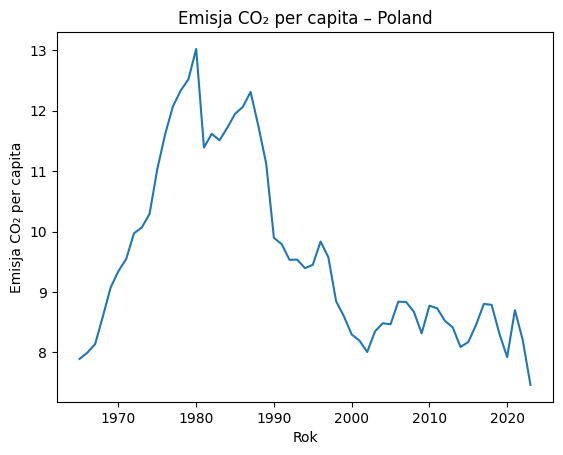

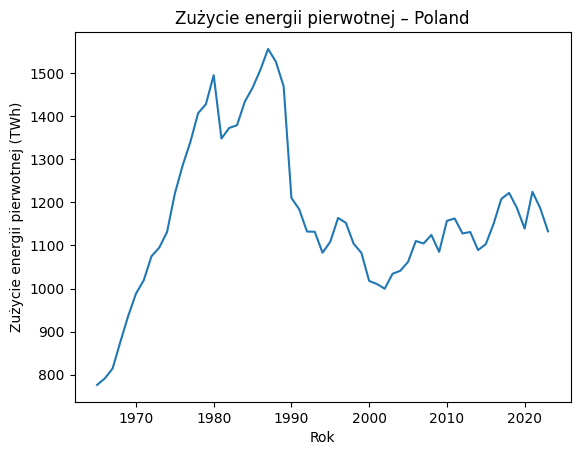

In [35]:
#Część 4
#SQL
country = "Poland"

conn = sqlite3.connect("energy_co2.db")

query = """
SELECT Year, co2_per_capita, energy_twh
FROM country_emissions
WHERE Entity = ?
ORDER BY Year
"""

df = pd.read_sql(query, conn, params=(country,))
conn.close()

plt.figure()
plt.plot(df["Year"], df["co2_per_capita"])
plt.xlabel("Rok")
plt.ylabel("Emisja CO₂ per capita")
plt.title(f"Emisja CO₂ per capita – {country}")
plt.show()


plt.figure()
plt.plot(df["Year"], df["energy_twh"])
plt.xlabel("Rok")
plt.ylabel("Zużycie energii pierwotnej (TWh)")
plt.title(f"Zużycie energii pierwotnej – {country}")
plt.show()


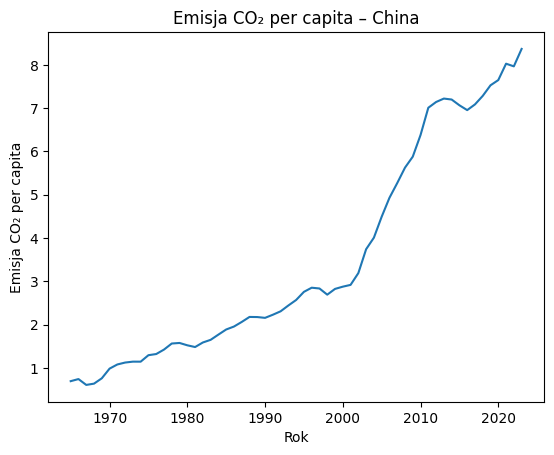

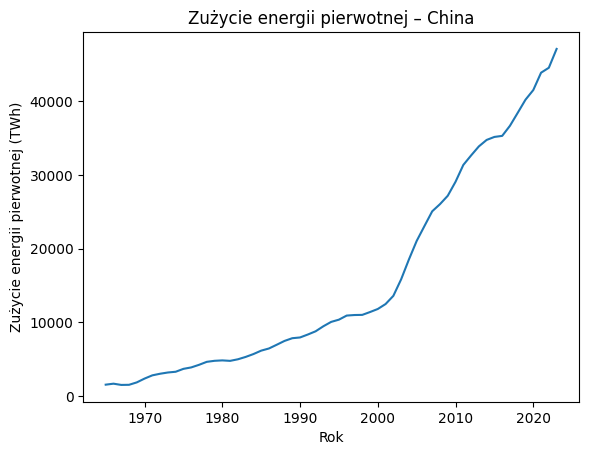

In [36]:
#Część 4
#EXCEL
country = "China"

df = pd.read_excel(
    "co2_energy_by_country.xlsx",
    sheet_name=country
)
plt.figure()
plt.plot(df["Year"], df["Annual CO₂ emissions (per capita)"])
plt.xlabel("Rok")
plt.ylabel("Emisja CO₂ per capita")
plt.title(f"Emisja CO₂ per capita – {country}")
plt.show()


plt.figure()
plt.plot(df["Year"], df["Primary energy consumption (TWh)"])
plt.xlabel("Rok")
plt.ylabel("Zużycie energii pierwotnej (TWh)")
plt.title(f"Zużycie energii pierwotnej – {country}")
plt.show()
